In [1]:
from math import log
import numpy as np
import pandas as pd

import findspark

from pyspark.context import SparkContext
import sys
import os

os.environ['HADOOP_HOME'] = "C:/winutils"
sys.path.append("C:/winutils/bin")

# Find Spark Locally
location = findspark.find()
findspark.init(location, edit_rc=True)

# Start a SparkContext 
sc = SparkContext(master = 'local[*]')
sc.setLogLevel("ERROR")


Downloading the dataset via Kaggle API ... 

In [2]:
import os
import glob
import zipfile

#!pip install kaggle

import sys

os.makedirs("./kaggleAPI")

original_stdout = sys.stdout # Save a reference to the original standard output

with open('./kaggleAPI/kaggle.json', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print("{\"username\":\"alessiobonatesta\",\"key\":\"cd8bf320af4b301a0cbaad126e81ea5a\"}")
    sys.stdout = original_stdout

os.environ['KAGGLE_CONFIG_DIR'] = "./kaggleAPI"
#download the dataset
!kaggle datasets download -d yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018

files = glob.glob('./airline-delay-and-cancellation-data-2009-2018.zip')
for file in files:
    print('Unzipping:',file)

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('./')



Unzipping: ./airline-delay-and-cancellation-data-2009-2018.zip



  0%|          | 0.00/1.95G [00:00<?, ?B/s]
  0%|          | 2.00M/1.95G [00:00<02:16, 15.3MB/s]
  0%|          | 5.00M/1.95G [00:00<01:44, 20.0MB/s]
  0%|          | 8.00M/1.95G [00:00<01:26, 24.1MB/s]
  1%|          | 11.0M/1.95G [00:00<01:39, 20.9MB/s]
  1%|          | 15.0M/1.95G [00:00<01:24, 24.5MB/s]
  1%|          | 19.0M/1.95G [00:00<01:16, 27.1MB/s]
  1%|          | 23.0M/1.95G [00:00<01:18, 26.4MB/s]
  1%|▏         | 27.0M/1.95G [00:01<01:11, 28.9MB/s]
  2%|▏         | 31.0M/1.95G [00:01<01:05, 31.2MB/s]
  2%|▏         | 35.0M/1.95G [00:01<01:07, 30.2MB/s]
  2%|▏         | 38.0M/1.95G [00:01<01:07, 30.3MB/s]
  2%|▏         | 41.0M/1.95G [00:01<01:08, 29.7MB/s]
  2%|▏         | 45.0M/1.95G [00:01<01:11, 28.7MB/s]
  2%|▏         | 49.0M/1.95G [00:01<01:05, 31.2MB/s]
  3%|▎         | 53.0M/1.95G [00:01<01:04, 31.6MB/s]
  3%|▎         | 57.0M/1.95G [00:02<01:04, 31.3MB/s]
  3%|▎         | 61.0M/1.95G [00:02<01:03, 31.9MB/s]
  3%|▎         | 65.0M/1.95G [00:02<01:01, 32.6MB/s]
 

In [3]:
import pandas as pd
#importing dataset with pandas
rawData = pd.read_csv("./2018.csv")
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [4]:
#display table content
pd.set_option('display.max_columns', None)
rawData.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


Now let's have a look at the distribution of the datas in the dataset. To find out  if the dataset is unbalanced the percentage of datapoints on the total is calculated for both labels.

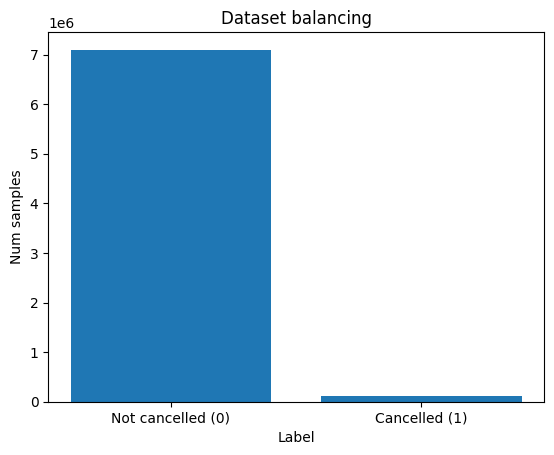

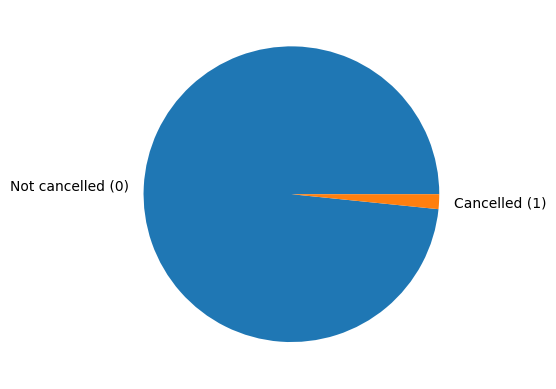

Points with label 0:  7096862 ( 98.38379603867556 %)
Points with label 1:  116584 ( 1.6162039613244488 %)


In [5]:
import matplotlib.pyplot as plt


zeros = rawData.query('CANCELLED == 0')
percentage_zero = 100 * len(zeros) / len(rawData)
ones = rawData.query('CANCELLED == 1')
percentage_one = 100 * len(ones)/len(rawData)

labels = ["Not cancelled (0)","Cancelled (1)"]
val = [len(zeros),len(ones)]

x = np.arange(len(labels))

plt.bar(x, val, align='center')
plt.xticks(x, labels)
plt.ylabel('Num samples')
plt.xlabel('Label')
plt.title('Dataset balancing')
plt.show()

percentage = [percentage_zero,percentage_one]
plt.pie(percentage, labels=labels)
plt.show()

print('Points with label 0: ', len(zeros),'(',percentage_zero,'%)')
print('Points with label 1: ', len(ones),'(',percentage_one,'%)')

As can be seen the dataset is very unbalanced. In order to solve this problem we'll apply the method called "undersampling": we'll randomly pick a fraction of datapoint from the set of point with label 0 and we'll merge them with the set of label 1.

In [6]:
zeros= zeros.sample(frac=0.02) #used to randomly sample a fraction of point
dataset = pd.concat([zeros,ones])
dataset.sample(frac=1) #used to shuffle after the concat operation

zeros = dataset.query('CANCELLED == 0')
percentage_zero = 100 * len(zeros) / len(dataset)
ones = dataset.query('CANCELLED == 1')
percentage_one = 100 * len(ones)/len(dataset)

print(len(dataset))
print('Points with label 0: ', len(zeros),'(',percentage_zero,'%)')
print('Points with label 1: ', len(ones),'(',percentage_one,'%)')



258521
Points with label 0:  141937 ( 54.903470124283906 %)
Points with label 1:  116584 ( 45.096529875716094 %)


To increse the number of sample, let's repeat this operation with another set of datas.

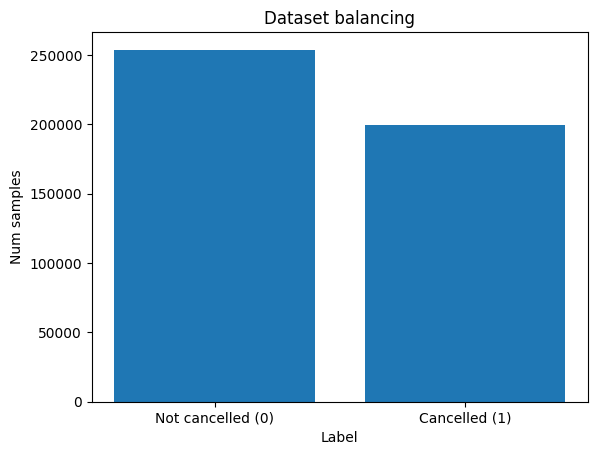

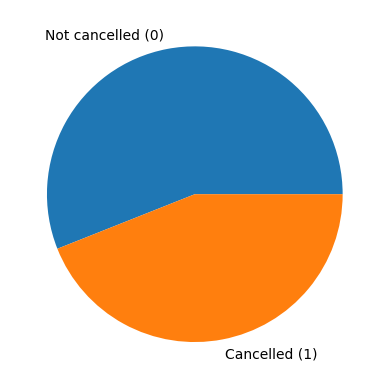

453053
Points with label 0:  253776 ( 56.01463846393248 %)
Points with label 1:  199277 ( 43.98536153606752 %)


In [7]:
rawData = pd.read_csv("C:\\Users\\Alessio\\Desktop\\Università\\LogisticRegression project\\archive\\2017.csv")
zeros2 = rawData.query('CANCELLED == 0')
percentage_zero = 100 * len(zeros) / len(rawData)
ones2 = rawData.query('CANCELLED == 1')
percentage_one = 100 * len(ones)/len(rawData)

zeros2= zeros2.sample(frac=0.02) 
dataset = pd.concat([zeros,ones,zeros2,ones2])
dataset.sample(frac=1) #used to shuffle after the concat operation

newZeros = dataset.query('CANCELLED == 0')
percentage_zero = 100 * len(newZeros) / len(dataset)
newOnes = dataset.query('CANCELLED == 1')
percentage_one = 100 * len(newOnes)/len(dataset)

labels = ["Not cancelled (0)","Cancelled (1)"]
val = [len(newZeros),len(newOnes)]

x = np.arange(len(labels))

plt.bar(x, val, align='center')
plt.xticks(x, labels)
plt.ylabel('Num samples')
plt.xlabel('Label')
plt.title('Dataset balancing')
plt.show()

percentage = [percentage_zero,percentage_one]
plt.pie(percentage, labels=labels)
plt.show()


print(len(dataset))
print('Points with label 0: ', len(newZeros),'(',percentage_zero,'%)')
print('Points with label 1: ', len(newOnes),'(',percentage_one,'%)')



Now let's drop the columns with datas that are not relevant for our model (datas that refer to informations after flight's departure)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453053 entries, 3907841 to 5672887
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              453053 non-null  object 
 1   OP_CARRIER           453053 non-null  object 
 2   OP_CARRIER_FL_NUM    453053 non-null  int64  
 3   ORIGIN               453053 non-null  object 
 4   DEST                 453053 non-null  object 
 5   CRS_DEP_TIME         453053 non-null  int64  
 6   DEP_TIME             260428 non-null  float64
 7   DEP_DELAY            260126 non-null  float64
 8   TAXI_OUT             255078 non-null  float64
 9   WHEELS_OFF           255083 non-null  float64
 10  WHEELS_ON            253686 non-null  float64
 11  TAXI_IN              253686 non-null  float64
 12  CRS_ARR_TIME         453053 non-null  int64  
 13  ARR_TIME             253686 non-null  float64
 14  ARR_DELAY            253103 non-null  float64
 15  CANCELLED 

In [9]:
#drop the column that are not needed
dataset.drop('DEP_TIME',inplace=True,axis=1)
dataset.drop('DEP_DELAY',inplace=True,axis=1)
dataset.drop('TAXI_OUT',inplace=True,axis=1)
dataset.drop('WHEELS_OFF',inplace=True,axis=1)
dataset.drop('WHEELS_ON',inplace=True,axis=1)
dataset.drop('TAXI_IN',inplace=True,axis=1)
dataset.drop('ARR_TIME',inplace=True,axis=1)
dataset.drop('ARR_DELAY',inplace=True,axis=1)
dataset.drop('CANCELLATION_CODE',inplace=True,axis=1)
dataset.drop('DIVERTED',inplace=True,axis=1)
dataset.drop('AIR_TIME',inplace=True,axis=1)
dataset.drop('CARRIER_DELAY',inplace=True,axis=1)
dataset.drop('ACTUAL_ELAPSED_TIME', inplace=True, axis=1)
dataset.drop('WEATHER_DELAY',inplace=True,axis=1)
dataset.drop('NAS_DELAY',inplace=True,axis=1)
dataset.drop('SECURITY_DELAY',inplace=True,axis=1)
dataset.drop('LATE_AIRCRAFT_DELAY',inplace=True,axis=1)
dataset.drop('Unnamed: 27', inplace=True, axis=1)

#move the CANCELLED label at the end 
cancelled = dataset.pop('CANCELLED')
dataset['CANCELLED'] = cancelled

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453053 entries, 3907841 to 5672887
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   FL_DATE            453053 non-null  object 
 1   OP_CARRIER         453053 non-null  object 
 2   OP_CARRIER_FL_NUM  453053 non-null  int64  
 3   ORIGIN             453053 non-null  object 
 4   DEST               453053 non-null  object 
 5   CRS_DEP_TIME       453053 non-null  int64  
 6   CRS_ARR_TIME       453053 non-null  int64  
 7   CRS_ELAPSED_TIME   453043 non-null  float64
 8   DISTANCE           453053 non-null  float64
 9   CANCELLED          453053 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 38.0+ MB


Now that the dataset is more balanced we can create the RDD and start working with the data.

In [10]:
#create the RDD 
temp = dataset.to_csv(header=None, index=False).strip('\n').split('\n')
dataRDD = (sc.parallelize(temp,16).map(lambda x: x.replace('\t',',')))
print("RDD created!")
print(dataRDD.take(1))

RDD created!
['2018-07-18,F9,1456,ATL,ISP,835,1057,142.0,795.0,0.0\r']


First, let's split the data in order to obtain a test set to validate the final model. For now the test set will be put aside and used at the end, in this way data preprocessing and model training and tuning will be performed on the training set and validation set. 

In [11]:
dataRDD , testSet = dataRDD.randomSplit([0.9,0.1],seed=18)
print("Points in training set: ",dataRDD.count())
print("Points in test set: ",testSet.count())

Points in training set:  407725
Points in test set:  45328



Now let's split on comma the RDD elements. In this way we can manipulate the single values. 

In [12]:
dataRDD = dataRDD.map(lambda x: x.split(','))
print(dataRDD.take(1))

[['2018-07-18', 'F9', '1456', 'ATL', 'ISP', '835', '1057', '142.0', '795.0', '0.0\r']]


Now let's encode the strings values (like "UA", "EWR","DEN") using one hot encoding. To do so, the following two functions were been defined in order to create a dictionary that map each feature with a unique integer value. The first function maps each possible value of the OP_CARRIER column; the second one maps each pair (origin,destination). Origin and destination are mapped together to make the model learn that two different trip with origin and destination inverted have different probability to be cancelled. 

In [13]:
def create_opCarrier_dict(dataInput):
    distinctLabel = dataInput.map(lambda x: x[1]).distinct()
    opCarrierDict = distinctLabel.zipWithIndex().collectAsMap()
    return opCarrierDict
def create_pair_dict(dataInput):
    distinctLabel = dataInput.map(lambda x: (x[3],x[4])).distinct()
    return distinctLabel.zipWithIndex().collectAsMap()

opCarrierDict = create_opCarrier_dict(dataRDD) 
pairDict = create_pair_dict(dataRDD)

After that, the following function will apply the OHE representation, adding the list of One Hot Encoded feature into each point 

In [14]:
#One Hot Encode of opCarrier attribute and (origin,destination) pair

def addOHE(point,opDict,pairDict):
    if (point[3],point[4]) in pairDict and (point[1]) in opDict:
        pairIndex = pairDict[(point[3],point[4])]
        pairOHEpart = np.zeros(len(pairDict.keys())).tolist()
        pairOHEpart[pairIndex] = 1

        opIndex = opDict[point[1]]
        opOHEpart = np.zeros(len(opDict.keys())).tolist()
        opOHEpart[opIndex] = 1
    else:                       #to handle unseen categorical value in the test set
        opOHEpart=['ToDel']
        pairOHEpart=['ToDel']
    newPoint = []
    newPoint.append(point[0])
    newPoint.append(point[2])
    
    return newPoint + opOHEpart + pairOHEpart + point[5:] 

dataRDD = dataRDD.map(lambda x: addOHE(x,opCarrierDict,pairDict))

Now let's create a function to handle the values in the data column. The year won't be specified anymore in order to generally highlight the importance of the time of the year: we don't care if some flights have been cancelled in a specific year in the past, we only want to learn the relevance of the days in a year. The function maps any day into its index in the year (for example, 1st January will be transformed in 1, 2nd Jan in 2, and so on).

In [15]:
import datetime

#function to handle data value with integers
def dateMap(point):
    
    splittedDate = point[0].split('-')
    d = datetime.date(int(splittedDate[0]), int(splittedDate[1]), int(splittedDate[2]))
    point[0]= d.timetuple().tm_yday
    return point

dataRDD = dataRDD.map(lambda x: dateMap(x))

The following function will convert the point in list of float values

In [16]:
#convert the point (string) in an array of float 
def stringToFloat(point):
    newPoint = []
    for x in point:
        if type(x)==str:
            if('\r' in x): x.replace('\r','')
            if(x==''): x='0'
        newPoint.append(float(x))
    return newPoint

dataRDD = dataRDD.map(lambda x: stringToFloat(x))

The last value represent the CANCELLED label {0,1}, where 0 means that the flight has not been cancelled. We want to substitute each 0 value of the last dimension with the number -1 for mathematical purpose (we need this to apply the gradient descent rule further on).

In [17]:
def replaceLabel(x):
    if x[-1] == 0: 
        x[-1] = -1
    return x 
dataRDD = dataRDD.map(lambda x: replaceLabel(x))

Now we want to convert the list of float values within a sparse representation, since the OHE part largely increases the number of feature of the vectors.

In [18]:
n_features = len(dataRDD.first()) - 1
N=dataRDD.count()

#data in the form (i,X,y) where i is the row number
dataRDD = dataRDD.zipWithIndex().map(lambda x: (x[1],x[0])).map(lambda x: (x[0],x[1][:-1],x[1][-1]))

#tranform the lists X in the RDD in sparse vector with the form (pos,val)
#each RDD element will be represented as (i,sparse(x),y)

def sparsePoint(x):
        values=[]
        i=0
        for el in x:
            if el!=0:
                values.append((i,el))
            i+=1
        return values

sparseX = dataRDD.map(lambda x: (x[0],sparsePoint(x[1]),x[2]))
sparseX.cache()
sparseX.take(1)

[(0,
  [(0, 199.0),
   (1, 1456.0),
   (8, 1.0),
   (4874, 1.0),
   (6009, 835.0),
   (6010, 1057.0),
   (6011, 142.0),
   (6012, 795.0)],
  -1)]

To obtain better results during the regression phase, the data will be normalised using the z-score method.

In [19]:
from math import sqrt
#computing the mean for each column and storing the results in a list 
#where meansVector[i] is the mean for the column at the index i

means =  sparseX.map(lambda x: x[1]).flatMap(lambda f: f)\
    .reduceByKey(lambda x,y:x+y).map(lambda x: (x[0],x[1]/N)).collect()

meansVector=np.zeros(n_features)
for (i,val) in means:
        meansVector[i]=val
        
#computing the standard deviation for each column and storing the results in a list 
#where deviationsVector[i] is the standard deviation for the column at the index i

deviations = sparseX.map(lambda x :x[1]).flatMap(lambda f: f)\
    .map(lambda x: (x[0],pow(x[1]-meansVector[x[0]],2))).reduceByKey(lambda x,y: x+y)\
        .map(lambda x: (x[0],sqrt(x[1]/N))).collect()

deviationsVector=np.ones(n_features)
for (i,val) in deviations:
    if val!=0: deviationsVector[i]=val

#computing the z-score normalization on each point
def zNormalize(x,means,deviations):
    newVector=[]
    for (i,value) in x[1]:
        newValue = (value - means[i])/deviations[i] if value!=1 else 1  #not applied on one hot encoded features
        newVector.append((i,newValue))
    return (x[0],newVector,x[2])

sparseX = sparseX.map(lambda x: zNormalize(x,meansVector,deviationsVector))
print(sparseX.take(1))

[(0, [(0, 0.23988943186265912), (1, -0.6002691803968168), (8, 1), (4874, 1), (6009, -1.0482302137498458), (6010, -0.8586520818953797), (6011, 0.0585364476323235), (6012, 0.04971780945372742)], -1)]


Now that the data is ready, we can define the LogisticRegression class.

The loss function used is the logarithmic loss: $$ l(y,\hat{y}) = I(y = +1)\log{\frac{1}{\hat{y}}} + I(y = -1)\log{\frac{1}{1-\hat{y}}}  $$
This function can be reduced to the logistic loss function: $$ \log (1+ e^{y\hat{y}})$$
where $\hat{y}$ is the predictor $g(x)$ trained and used in the sigmoid function.
In our case $g(x)$ is a linear model $g(x)=w^\intercal x$ and so, after the addition of a regularization term and after having calculated the derivative, the update rule for the vector $w$ can be written as: $$ w_{t+1} = w_t + \eta_t(\sigma(-y_tw^\intercal x)y_tx_t - \lambda w)$$

In order to distribute the computation of the update terms for each point, the batch learning method will be applied: this means that the term $\sigma(-y_tw^\intercal x)y_tx_t - \lambda w$ will be computed for each point and all the results will be summed up and divided by the number of points.

In [20]:
from math import log
import numpy as np
from pyspark.context import SparkContext
class LogisticRegression:
    def __init__(self, lr=100, maxIter=50,decay_Rate=1,regularizationTerm=0.00001):
            self.lr = lr
            self.maxIter = maxIter
            self.decayRate=decay_Rate
            self.weights = None
            self.regTerm=regularizationTerm
        
    def fit(self, trainingSet):
        alfa=self.lr
        num_features = trainingSet.first()[1][-1][0] +1
        self.weights = np.zeros(num_features)
        num_point=trainingSet.count()
        datas=trainingSet
        datas.cache()
        for epoch in range (self.maxIter):
            self.lr = alfa/(self.decayRate*epoch + 1)        #learning rate decay
            update = datas.map(lambda x: self.computeDew(x,self.weights)).sum()
            updateTerm = (update/num_point)*self.lr
            if np.amax(updateTerm) <= 0.0001: break
            self.weights = self.weights + updateTerm
            del update
    
    
    def evaluate(self, S):  #return the mean loss on the predictions made on the validation set S
        xy = S.map(lambda x: (x[1],x[2]))   
        linearPredictions = xy.map(lambda x: (self.dot(x,self.weights),x[1]))   #By keeping the y encapsulated
        losses = linearPredictions.map(lambda x: self.loss(x[0],x[1]))
        return losses.mean()

    
    def loss(self,linear,y):
        linear = min(linear,25)
        linear = max(linear,-25)
        return log(1+np.exp(-y*linear))

    def dot(self,xy,w):
        linear=0
        for (i,val) in xy[0]:
            linear = linear+ val*w[i]
        return linear

    def computeDew(self,x,w):
        X=x[1]
        y=x[2]
        dot=0
        for (i,val) in X:
            dot= dot+ val*w[i]
        z=dot*y*(-1)
        sig=self.sigmoid(z)
        dew=np.zeros(len(w))
        for (i,val) in X:
            dew[i]=sig*y*val
        dew= dew - self.regTerm*w
        return dew
                    

    def sigmoid(self,linearPoint):
        linearPoint = min(linearPoint,25)
        linearPoint = max(linearPoint,-25)
        return 1 / (1 + np.exp(-linearPoint))

    def predict(self,S, threshold=0.5):
        xy = S.map(lambda x: (x[1],x[2]))   # (index, X, y) -> (X, y)
        linearPredictions = xy.map(lambda x: (self.dot(x,self.weights),x[1]))   # (X, y) -> (linearPrediction, y)
        y_predicted= linearPredictions.map(lambda x: (1 if self.sigmoid(x[0])>threshold else -1,x[1]))

        return y_predicted

    

Now let's split the dataset and fit the model on the training datas 

In [21]:
trainData,validationData = sparseX.randomSplit([0.8,0.2], seed=33)
model = LogisticRegression()
#model.fit(trainData)

After that, let's check the training error and the validation error by evaluating the two sets

In [ ]:
trainError = model.evaluate(trainData)
validationError= model.evaluate(validationData)
print("Training error: ", trainError)
print("Validation error: ",validationError)

Training error:  0.6389473379132516
Validation error:  0.6380651344328495


Now let's check how many prediction are correct on both sets.

In [ ]:
num_trainData = trainData.count()
trainData_predictions = model.predict(trainData)
trainData_correctPredictions= trainData_predictions.map(lambda x: 1 if x[0]==x[1] else 0).filter(lambda x: x==1).count()  # 1 for correct prediction and 0 for wrong ones
print(trainData_correctPredictions, " correct predictions on a total of ", num_trainData, " ( ",trainData_correctPredictions*100/num_trainData," % )")

num_validationData = validationData.count()
validationData_predictions = model.predict(validationData)
validationData_correctPredictions= validationData_predictions.map(lambda x: 1 if x[0]==x[1] else 0).filter(lambda x: x==1).count()  # 1 for correct prediction and 0 for wrong ones
print(validationData_correctPredictions, " correct predictions on a total of ", num_validationData, " ( ",validationData_correctPredictions*100/num_validationData," % )" )

206901  correct predictions on a total of  326038  (  63.45916733632276  % )
51857  correct predictions on a total of  81687  (  63.482561484691566  % )


Learning rate and Regularization term tuning ... 

In [ ]:
learningRates=[90, 110, 120]
regTerms=[1e-6, 1e-5, 1e-4]    
results=[]
for mylr in learningRates:
    for rt in regTerms:
        model = LogisticRegression(lr=mylr,maxIter=50,regularizationTerm=rt)
        model.fit(trainData)
        trainError = model.evaluate(trainData)
        validationError= model.evaluate(validationData)
        results.append((mylr,rt,trainError,validationError))
for r in results:
    print("Learning rate: ", r[0])
    print("Regularization term: ", r[1])
    print("\t Training error: ", r[2])
    print("\t Validation error: ", r[3])
    print("----------------------")

Learning rate:  90
Regularization term:  1e-06
	 Training error:  0.6392398207660596
	 Validation error:  0.6383658203855187
----------------------
Learning rate:  90
Regularization term:  1e-05
	 Training error:  0.6392387320476381
	 Validation error:  0.6383643759374054
----------------------
Learning rate:  90
Regularization term:  0.0001
	 Training error:  0.6392321789545953
	 Validation error:  0.6383543175372242
----------------------
Learning rate:  110
Regularization term:  1e-06
	 Training error:  0.6387527721833673
	 Validation error:  0.6378645590051413
----------------------
Learning rate:  110
Regularization term:  1e-05
	 Training error:  0.63874806350845
	 Validation error:  0.6378594466314845
----------------------
Learning rate:  110
Regularization term:  0.0001
	 Training error:  0.6387082815396863
	 Validation error:  0.6378157161000633
----------------------
Learning rate:  120
Regularization term:  1e-06
	 Training error:  0.6386454839458819
	 Validation error:  0.

Finally, let's check the correct predictions with the new parameters

In [ ]:
model = LogisticRegression(lr=120,regularizationTerm=1e-4) 
model.fit(trainData)

trainData_predictions = model.predict(trainData) 
trainData_correctPredictions= trainData_predictions.filter(lambda x: x[0]==x[1]).count()   # 1 for correct prediction and 0 for wrong ones
print(trainData_correctPredictions, " correct predictions on a total of ", num_trainData, " ( ",trainData_correctPredictions*100/num_trainData," % )")

validationData_predictions = model.predict(validationData) 
validationData_correctPredictions= validationData_predictions.filter(lambda x: x[0]==x[1]).count()   # 1 for correct prediction and 0 for wrong ones
print(validationData_correctPredictions, " correct predictions on a total of ", num_validationData, " ( ",validationData_correctPredictions*100/num_validationData," % )" )

207035  correct predictions on a total of  326038  (  63.500266840061585  % )
51949  correct predictions on a total of  81687  (  63.595186504584575  % )


Lastly, let's try to change the threshold for which one of the two classes is attributed

In [ ]:
thresholds=[0.4,0.45,0.48,0.5,0.52,0.55]
for t in thresholds:
    trainData_predictions = model.predict(trainData,threshold=t) 
    trainData_correctPredictions= trainData_predictions.filter(lambda x: x[0]==x[1]).count() 
    print("Threshold: ", t)
    print("\t",trainData_correctPredictions, " correct predictions on a total of ", num_trainData, " ( ",trainData_correctPredictions*100/num_trainData," % )")

    validationData_predictions = model.predict(validationData,threshold=t) 
    validationData_correctPredictions= validationData_predictions.filter(lambda x: x[0]==x[1]).count() 
    print("\t",validationData_correctPredictions, " correct predictions on a total of ", num_validationData, " ( ",validationData_correctPredictions*100/num_validationData," % )" )


Threshold:  0.4
	 200174  correct predictions on a total of  326038  (  61.3959109060907  % )
	 50226  correct predictions on a total of  81687  (  61.48591575158838  % )
Threshold:  0.45
	 205701  correct predictions on a total of  326038  (  63.09111207896012  % )
	 51716  correct predictions on a total of  81687  (  63.30995139985555  % )
Threshold:  0.48
	 207132  correct predictions on a total of  326038  (  63.53001797336507  % )
	 52047  correct predictions on a total of  81687  (  63.7151566344706  % )
Threshold:  0.5
	 207035  correct predictions on a total of  326038  (  63.500266840061585  % )
	 51949  correct predictions on a total of  81687  (  63.595186504584575  % )
Threshold:  0.52
	 206496  correct predictions on a total of  326038  (  63.33494868696287  % )
	 51863  correct predictions on a total of  81687  (  63.48990659468459  % )
Threshold:  0.55
	 205747  correct predictions on a total of  326038  (  63.105220863825686  % )
	 51622  correct predictions on a total 

Now that we have a trained and tuned model, we can test it on the test set generated at the beggining. In order to do so, first we have to preprocess the data in the test set, following the same passages executed for the training set.

In [22]:
testSet = testSet.map(lambda x: x.split(','))
testSet = testSet.map(lambda x: addOHE(x,opCarrierDict,pairDict)).filter(lambda x: x[3]!='ToDel')  #in order to delete rows with unseen value during preprocessing of training set
testSet = testSet.map(lambda x: dateMap(x)).map(lambda x: stringToFloat(x)).map(lambda x: replaceLabel(x))


testNumFeatures = len(testSet.first()) - 1
testSet_N=testSet.count()

#data in the form (i,X,y) where i is the row number
testSet = testSet.zipWithIndex().map(lambda x: (x[1],x[0])).map(lambda x: (x[0],x[1][:-1],x[1][-1]))

#transform within its sparse representation
sparseTest = testSet.map(lambda x: (x[0],sparsePoint(x[1]),x[2]))

# Normalization ... 

testMeans =  sparseTest.map(lambda x: x[1]).flatMap(lambda f: f)\
    .reduceByKey(lambda x,y:x+y).map(lambda x: (x[0],x[1]/testSet_N)).collect()
testMeansVector=np.zeros(testNumFeatures)
for (i,val) in testMeans:
        testMeansVector[i]=val

testDeviations = sparseTest.map(lambda x :x[1]).flatMap(lambda f: f)\
    .map(lambda x: (x[0],pow(x[1]-testMeansVector[x[0]],2))).reduceByKey(lambda x,y: x+y)\
        .map(lambda x: (x[0],sqrt(x[1]/testSet_N))).collect()
testDeviationsVector=np.ones(testNumFeatures)
for (i,val) in testDeviations:
    if val!=0: testDeviationsVector[i]=val

sparseTest = sparseTest.map(lambda x: zNormalize(x,testMeansVector,testDeviationsVector))
sparseTest.cache()
print(sparseTest.take(1))

[(0, [(0, -1.4089774430110833), (1, 0.5421708995823329), (3, 1), (5351, 1), (6009, -1.2732607147039507), (6010, -1.1065212895015928), (6011, -0.2373592867967956), (6012, -0.45410378867443135)], -1)]


Finally we can test the model by predicting labels of the test set.

In [23]:
model.fit(sparseX) #retrain the model on the entire training set (sparseX = training set + validation set) 
print("Test error: ", model.evaluate(sparseTest))
test_predictions = model.predict(sparseTest,threshold=0.48) 
test_correctPredictions= test_predictions.filter(lambda x: x[0]==x[1]).count() 
print(test_correctPredictions, " correct predictions on a total of ", testSet_N, " ( ",test_correctPredictions*100/testSet_N," % )")

Test error:  0.6420913653753874
28574  correct predictions on a total of  45286  (  63.096762796449234  % )
